In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("failure.csv")

In [3]:
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [4]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [6]:
df["failure"].value_counts()

0    124388
1       106
Name: failure, dtype: int64

<AxesSubplot:xlabel='failure', ylabel='count'>

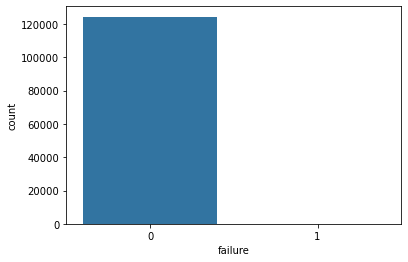

In [7]:
sns.countplot(df["failure"])

In [8]:
df["device"].nunique()

1168

In [9]:
#df.groupby(["failure", "device"])["failure"].count()

In [10]:
Failure = df[df.failure==1]

Failure.device.value_counts().sort_values(ascending=False)

W1F0FW0S    1
S1F0S4T6    1
S1F0QF3R    1
S1F0RRB1    1
S1F135TN    1
           ..
W1F1BFP5    1
W1F11ZG9    1
W1F0T034    1
S1F023H2    1
S1F0CTDN    1
Name: device, Length: 106, dtype: int64

In [11]:
df["attribute1"].value_counts()

57192360     26
89196552     26
165048912    26
169490248    23
89162648     15
             ..
109310032     1
11165664      1
41938320      1
95132688      1
47936704      1
Name: attribute1, Length: 123878, dtype: int64

In [12]:
df["attribute2"].value_counts()

0        118110
2344        281
8           260
24          254
40          201
          ...  
1568          1
1504          1
1376          1
1120          1
27856         1
Name: attribute2, Length: 558, dtype: int64

In [13]:
df["attribute3"].value_counts()

0        115359
1          3274
2           749
7           298
34          293
5           278
21          269
4           268
9           262
8           251
100         245
61          245
10          241
1331        240
220         240
107         228
15          225
62          224
2693        179
318         177
70          118
3           113
18          106
56           96
12           90
72           84
263          84
406          84
35           70
11           14
208          13
14           12
25            6
377           6
266           6
323           6
2112          6
36            5
16            5
1326          5
53            5
382           5
24929         4
279           3
24            1
38            1
1162          1
Name: attribute3, dtype: int64

In [14]:
df["attribute4"].value_counts()

0      115156
6        3681
1         889
2         711
3         466
        ...  
300         1
45          1
173         1
86          1
90          1
Name: attribute4, Length: 115, dtype: int64

In [15]:
df["attribute5"].value_counts()

8     22144
9     13597
11    12793
10    11480
7     11271
12     9843
6      8542
13     6006
14     3517
5      3429
16     3140
15     1337
17     1052
4       933
19      901
3       815
58      771
24      720
95      672
60      672
63      672
37      635
36      562
23      557
32      476
68      448
92      448
57      448
20      421
90      357
33      306
25      305
38      291
39      252
64      252
18      251
35      230
31      230
59      224
61      224
62      224
98      224
78      224
66      224
89      224
94      224
67      224
70      224
91      215
34      213
21      211
2       203
1       173
40      151
65      117
42       94
30       45
22       30
29       18
41        8
Name: attribute5, dtype: int64

In [16]:
df["attribute6"].value_counts()

31        777
44        708
27        636
26        520
29        441
         ... 
495400      1
255781      1
270106      1
263961      1
243305      1
Name: attribute6, Length: 44838, dtype: int64

In [17]:
df["attribute7"].value_counts()

0      123036
8         793
16        397
24         65
48         36
32         35
128        23
40         20
176        20
6          13
72         11
96          7
56          6
312         5
736         4
80          4
104         3
152         2
22          2
832         2
112         2
272         2
216         1
424         1
744         1
240         1
496         1
136         1
Name: attribute7, dtype: int64

In [18]:
df["attribute8"].value_counts()

0      123036
8         793
16        397
24         65
48         36
32         35
128        23
40         20
176        20
6          13
72         11
96          7
56          6
312         5
736         4
80          4
104         3
152         2
22          2
832         2
112         2
272         2
216         1
424         1
744         1
240         1
496         1
136         1
Name: attribute8, dtype: int64

In [19]:
df["attribute9"].value_counts()

0        97358
1         9436
2         3722
3         2327
4         1396
         ...  
18701        5
10137        4
38           3
30           3
2269         1
Name: attribute9, Length: 65, dtype: int64

<AxesSubplot:>

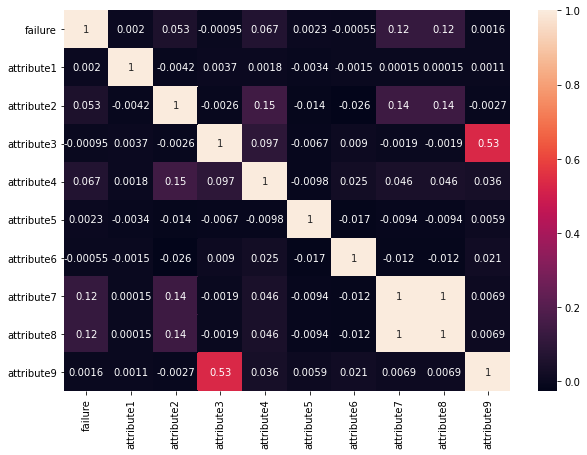

In [20]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot=True)

In [21]:
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

<AxesSubplot:xlabel='month'>

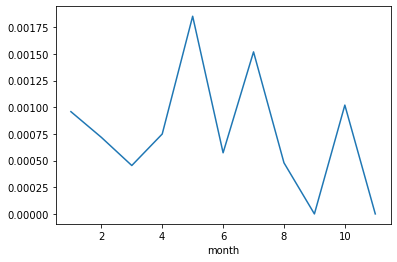

In [22]:
df.groupby("month")["failure"].mean().plot()

In [23]:
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,2015,1,1
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,2015,1,1
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,2015,1,1
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,2015,1,1
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,2015,11,2
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,2015,11,2
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,2015,11,2
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,2015,11,2


In [24]:
df=df.drop(["attribute8", "attribute9"],axis=1)

In [25]:
df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,year,month,day
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,2015,1,1
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,2015,1,1
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,2015,1,1
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,2015,1,1
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,2015,11,2
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,2015,11,2
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,2015,11,2
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,2015,11,2


In [26]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,year,month,day
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.0,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,2015.0,4.028299,14.894196
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,0.0,2.572167,8.759542
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,2015.0,1.000000,1.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,2015.0,2.000000,7.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,2015.0,3.000000,15.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,2015.0,6.000000,22.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,2015.0,11.000000,31.000000


In [27]:
abs(df.corr()["failure"].sort_values(ascending=False))

failure       1.000000
attribute7    0.119055
attribute4    0.067398
attribute2    0.052902
day           0.002994
attribute5    0.002270
attribute1    0.001984
month         0.000321
attribute6    0.000550
attribute3    0.000948
year               NaN
Name: failure, dtype: float64

In [28]:
x=df.drop(["failure","year", "date"],axis=1)

In [29]:
x=pd.get_dummies(x,drop_first=True)

In [30]:
y=df["failure"]

In [31]:
x.shape,y.shape

((124494, 1176), (124494,))

In [32]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    
    import imblearn
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
              
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    G=GradientBoostingClassifier()
      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13)
    
    
    algos=[g,b,KN,SVC,D,R,Log,XGB,G]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier','GradientBoostingClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    RUS=RandomUnderSampler(random_state=42)
    x_RUS,y_RUS=RUS.fit_resample(x_train,y_train)
    
    for item in algos:

        #item.fit(x_RUS,y_RUS)
        predict=item.fit(x_RUS,y_RUS).predict(x_test)
        
        
        accuracy_scored.append(accuracy_score(y_test,predict))
        precision_scored.append(precision_score(y_test,predict))
        recall_scored.append(recall_score(y_test,predict))
        f1_scored.append(f1_score(y_test,predict))

    result=pd.DataFrame(columns=['accuracy_score','f1_score','recall_score','precision_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    
    return result.sort_values('accuracy_score',ascending=False)

In [33]:
classification_funct(x,y)

[06:18:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,accuracy_score,f1_score,recall_score,precision_score
GaussianNB,0.990939,0.020833,0.081081,0.011952
RandomForestClassifier,0.888832,0.014806,0.702703,0.007482
BernoulliNB,0.888029,0.015259,0.729730,0.007710
GradientBoostingClassifier,0.867080,0.011470,0.648649,0.005786
DecisionTreeClassifier,0.829456,0.008592,0.621622,0.004326
XGBClassifier,0.826243,0.010611,0.783784,0.005342
SVC,0.645868,0.002895,0.432432,0.001452
KNeighborsClassifier,0.490265,0.002264,0.486486,0.001135
LogisticRegression,0.001189,0.002375,1.000000,0.001189
